In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
df = pd.read_csv('rendimiento.csv', sep=';')

C:\TEMP\ipykernel_18136\1854726505.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('rendimiento2.csv', sep=';')


In [39]:
sample = df.sample(frac=1, random_state=1).reset_index(drop=True)
# crear columna ID
sample.reset_index(inplace=True, drop=False)
sample.rename(columns={'index':'ID'}, inplace=True)

In [40]:
# a la columna nom_rbd ponerle "", sino no se puede importar a la base de datos
sample['NOM_RBD'] = sample['NOM_RBD'].apply(lambda x: '"'+x+'"')
#EDAD_ALU y PROM_GRAL to numeric
sample['EDAD_ALU'] = pd.to_numeric(sample['EDAD_ALU'], errors='coerce')
#PROM_GRAL replace ',' to '.' and to numeric
sample['PROM_GRAL'] = sample['PROM_GRAL'].str.replace(',', '.')
sample['PROM_GRAL'] = pd.to_numeric(sample['PROM_GRAL'], errors='coerce')

In [41]:
#funcion para recodificar genero
def recodificar_genero(x):
    if x == 1:
        return 'M'
    elif x == 2:
        return 'F'
    else:
        return np.nan
    
sample['GEN_ALU'] = sample['GEN_ALU'].apply(recodificar_genero)

In [42]:
#funcion para recodificar jornada
def recodificar_jornada(x):
    if x == 1:
        return 'Mañana'
    elif x == 2:
        return 'Tarde'
    elif x == 3:
        return 'Mañana y tarde'
    elif x == 4:
        return 'Vespertina/Nocturna'
    else:
        return np.nan

sample['COD_JOR'] = sample['COD_JOR'].apply(recodificar_jornada)

In [43]:
#funcion para recodificar dependencia
def recodificar_dependencia(x):
    if x == 1:
        return 'Municipal'
    elif x == 2:
        return 'Particular subvencionado'
    elif x == 3:
        return 'Particular pagado'
    elif x == 4:
        return 'Corporación de administración delegada'
    elif x == 5:
        return 'Servicio local de educación'
    else:
        return np.nan
    
sample['COD_DEPE2'] = sample['COD_DEPE2'].apply(recodificar_dependencia)

In [44]:
#funcion para recodificar estado
def recodificar_estado(x):
    if x == 1:
        return 'Funcionando'
    elif x == 2:
        return 'En receso'
    elif x == 3:
        return 'Cerrado'
    elif x == 4:
        return 'Autorizado sin matricula'
    else:
        return np.nan

sample['ESTADO_ESTAB'] = sample['ESTADO_ESTAB'].apply(recodificar_estado)

In [45]:
#funcion para recodificar tipo de enseñanza
def recodificar_tipo_ensenanza(x):
    if x == 2:
        return 'Educacion Basica Niños'
    elif x == 3:
        return 'Educacion Basica Adultos'
    elif x == 5:
        return 'Enseñanza Media Humanistico Cientifica Jovenes'
    elif x == 6:
        return 'Educacion Media Humanistico Cientifica Adultos'
    elif x == 7:
        return 'Enseñanza Media Tecnico Profesional y Artistica, Jovenes'
    elif x == 8:
        return 'Educacion Media Tecnico Profesional y Artistica, Adultos'
    else:
        return np.nan
    
sample['COD_ENSE2'] = sample['COD_ENSE2'].apply(recodificar_tipo_ensenanza)

In [46]:
#recodificar situacion final
def recodificar_situacion_final(x):
    if x == 'P':
        return 'Promovido'
    elif x == 'R':
        return 'Reprobado'
    elif x == 'Y':
        return 'Retirado'
    elif x == 'T':
        return 'Trasladado'
    else:
        return np.nan

sample['SIT_FIN_R'] = sample['SIT_FIN_R'].apply(recodificar_situacion_final)

In [67]:
#select first 5 rows with 4 columns
sample.to_csv('sample.csv', index=False, encoding='ansi')

**SNED**

In [48]:
#leer sne
sne = pd.read_csv('sned.csv', sep=';')
sne.dtypes

RBD                int64
DV_RBD             int64
NOM_RBD           object
RBD_A1            object
RBD_A2            object
COD_DEPE           int64
COD_DEPE2          int64
COD_REG_RBD        int64
COD_PRO_RBD        int64
COD_COM_RBD        int64
NOM_COM_RBD       object
COD_DEPROV_RBD     int64
NOM_DEPROV_RBD    object
RURAL_RBD          int64
EFECTIVR          object
SUPERAR           object
INICIAR           object
MEJORAR           object
INTEGRAR          object
IGUALDR           object
CLUSTER            int64
INDICER           object
SEL2020_25         int64
SEL2020_35         int64
SEL                int64
dtype: object

In [49]:
sne['NOM_RBD'] = sne['NOM_RBD'].apply(lambda x: '"'+x+'"')

In [50]:
#REFORMATEAR COLUMNAS DE PUNTAJE
sne['INDICER'] = sne['INDICER'].str.replace(',', '')
sne['EFECTIVR'] = sne['EFECTIVR'].str.replace(',', '')
sne['SUPERAR'] = sne['SUPERAR'].str.replace(',', '')
sne['MEJORAR'] = sne['MEJORAR'].str.replace(',', '')
sne['INTEGRAR'] = sne['INTEGRAR'].str.replace(',', '')
sne['IGUALDR'] = sne['IGUALDR'].str.replace(',', '')
sne['INICIAR'] = sne['INICIAR'].str.replace(',', '')


In [51]:
sne['INDICER'] = pd.to_numeric(sne['INDICER'], errors='coerce')
sne['EFECTIVR'] = pd.to_numeric(sne['EFECTIVR'], errors='coerce')
sne['SUPERAR'] = pd.to_numeric(sne['SUPERAR'], errors='coerce')
sne['MEJORAR'] = pd.to_numeric(sne['MEJORAR'], errors='coerce')
sne['INTEGRAR'] = pd.to_numeric(sne['INTEGRAR'], errors='coerce')
sne['IGUALDR'] = pd.to_numeric(sne['IGUALDR'], errors='coerce')
sne['INICIAR'] = pd.to_numeric(sne['INICIAR'], errors='coerce')

In [52]:
#funcion que recibe la serie, y realiza lo siguiente: si el numero es de 4 cifras, lo divide por 10, si es de 5, por 100, hasta 7 cifras
def dividir(numero):
    #convertir a float
    resultado = float(numero)
    if (numero>100) & (numero <=1000):
        resultado = numero/10
    elif (numero>1000) & (numero <=10000):
        resultado = numero/100
    elif (numero>10000) & (numero <=100000):
        resultado = numero/1000
    elif (numero>100000) & (numero <=1000000):
        resultado = numero/10000
    elif (numero>1000000) & (numero <=10000000):
        resultado = numero/100000
    elif (numero>10000000) & (numero <=100000000):
        resultado = numero/1000000
    
    return np.round(resultado, 2)
    


In [53]:
#aplicar la funcion a la columna indicer
sne['INDICER'] = sne['INDICER'].apply(dividir)   
sne['EFECTIVR'] = sne['EFECTIVR'].apply(dividir)
sne['SUPERAR'] = sne['SUPERAR'].apply(dividir)
sne['MEJORAR'] = sne['MEJORAR'].apply(dividir)
sne['INTEGRAR'] = sne['INTEGRAR'].apply(dividir)
sne['IGUALDR'] = sne['IGUALDR'].apply(dividir) 
sne['INICIAR'] = sne['INICIAR'].apply(dividir)

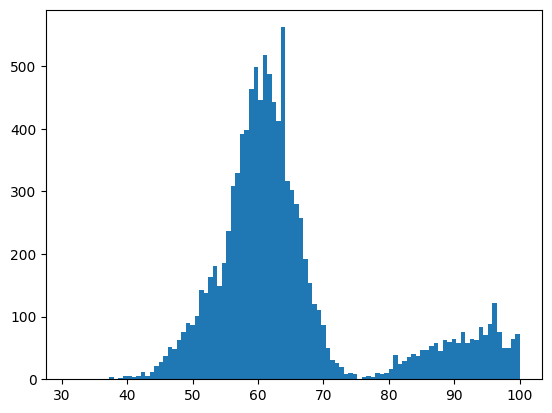

In [54]:
#histograma
plt.hist(sne['INDICER'], bins=100)
plt.show()

In [55]:
#funcion para recodificar subvencion
def recodificar_subvencion(x):
    if x == 1:
        return 1
    elif x == 2:
        return 0
    else:
        return np.nan

sne['SEL2020_25'] = sne['SEL2020_25'].apply(recodificar_subvencion)
sne['SEL2020_35'] = sne['SEL2020_35'].apply(recodificar_subvencion)


In [56]:
#recodificar dependencia

sne['COD_DEPE2'] = sne['COD_DEPE2'].apply(recodificar_dependencia)

In [57]:
#recodificar ruralidad

sne['RURAL_RBD'] = sne['RURAL_RBD'].apply(lambda x: q if x == 2 else 0)

In [58]:
#save sne
sne.to_csv('sned_fix.csv', index=False, sep=',')

#read sne_fix
sne_fix = pd.read_csv('sned_fix.csv', sep=',')

In [59]:
columnas_interes = ['RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'NOM_COM_RBD', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB']
columnas_faltantes = ['RBD','NOM_REG_RBD_A', 'ESTADO_ESTAB']

aux = sample[columnas_interes]
#rbd que estan en sample pero no en sne
particulares = aux[~aux['RBD'].isin(sne_fix['RBD'])]
#remove duplicates on RBD
particulares.drop_duplicates(subset='RBD', inplace=True)

#rbd que estan en sne y en sample
comunes = aux[aux['RBD'].isin(sne_fix['RBD'])][columnas_faltantes].sort_values(by='RBD').reset_index(drop=True)
#remove duplicates on RBD
comunes.drop_duplicates(subset='RBD', inplace=True)

#merge sne_fix y comunes on RBD
sne_comunes = pd.merge(sne_fix, comunes, on='RBD', how='left')
sne_comunes["NOM_REG_RBD_A"].isnull().sum()

#concatenar sne_comunes y particulares
sne_final = pd.concat([sne_comunes, particulares], axis=0)

#to string
sne_final["COD_REG_RBD"] = sne_final["COD_REG_RBD"].astype(str)
#save sne_final
sne_final.to_csv('sned_fix.csv', index=False, sep=',',  encoding="ansi")

C:\TEMP\ipykernel_18136\3988724724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particulares.drop_duplicates(subset='RBD', inplace=True)


**Docentes**

In [60]:
# read evaluacion_docente
evaluacion_docente = pd.read_csv('evaluacion_docente.csv', sep=';')

evaluacion_docente.dtypes

AGNO_EVAL          int64
RBD                int64
DGV_RBD            int64
NOM_RBD           object
COD_REG_RBD        int64
COD_PRO_RBD        int64
COD_COM_RBD        int64
NOM_COM_RBD       object
COD_DEPROV_RBD     int64
NOM_DEPROV_RBD    object
COD_DEPE           int64
COD_DEPE2          int64
RURAL_RBD          int64
ESTADO_ESTAB       int64
MRUN               int64
DOC_GENERO         int64
DOC_FEC_NAC       object
NIVEL             object
PF_PJE            object
PF_ESC            object
PF_Cat_Carrera    object
INSTR_PJE         object
INSTR_ESC         object
dtype: object

In [61]:
evaluacion_docente.head()

,AGNO_EVAL,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,...,ESTADO_ESTAB,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,PF_ESC,PF_Cat_Carrera,INSTR_PJE,INSTR_ESC
0,2021,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,1,22430522,2,197009,EMTP,"2,39",B,C,"2,73",C
1,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,2079332,2,197811,EE,"1,88",I,E,"2,33",B
2,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,20411562,2,197412,EP,"2,33",B,C,3,C
3,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,23980662,2,198810,EP,"2,53",C,B,"3,12",D
4,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,24974826,2,196012,EP,"2,33",B,C,"2,6",C


In [62]:
#reformatear PF_PJE y INSTR_PJE, reemplazar ',' por '.'
evaluacion_docente['PF_PJE'] = evaluacion_docente['PF_PJE'].str.replace(',', '.')
evaluacion_docente['INSTR_PJE'] = evaluacion_docente['INSTR_PJE'].str.replace(',', '.')
#convertir a numerico
evaluacion_docente['PF_PJE'] = pd.to_numeric(evaluacion_docente['PF_PJE'], errors='coerce')
evaluacion_docente['INSTR_PJE'] = pd.to_numeric(evaluacion_docente['INSTR_PJE'], errors='coerce')
evaluacion_docente.head()

,AGNO_EVAL,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,...,ESTADO_ESTAB,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,PF_ESC,PF_Cat_Carrera,INSTR_PJE,INSTR_ESC
0,2021,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,1,22430522,2,197009,EMTP,2.39,B,C,2.73,C
1,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,2079332,2,197811,EE,1.88,I,E,2.33,B
2,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,20411562,2,197412,EP,2.33,B,C,3.00,C
3,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,23980662,2,198810,EP,2.53,C,B,3.12,D
4,2021,2,7,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,151,ARICA,...,1,24974826,2,196012,EP,2.33,B,C,2.60,C


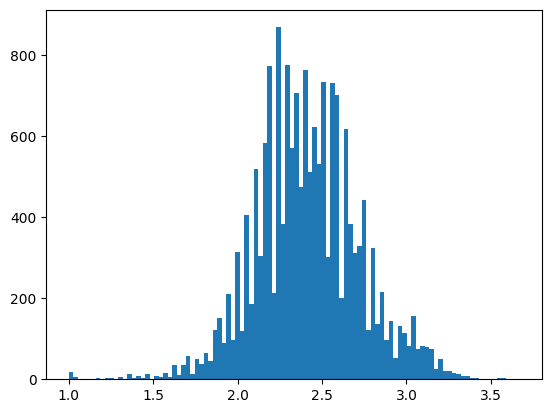

In [63]:
#replace -1 with NaN
evaluacion_docente['PF_PJE'] = evaluacion_docente['PF_PJE'].replace(-1, np.nan)
evaluacion_docente['INSTR_PJE'] = evaluacion_docente['INSTR_PJE'].replace(-1, np.nan)
#histograma
plt.hist(evaluacion_docente['PF_PJE'], bins=100)
plt.show()

In [64]:
#recodificar genero del docente

evaluacion_docente['DOC_GENERO'] = evaluacion_docente['DOC_GENERO'].apply(recodificar_genero)

In [65]:
#convertir la fecha de nacimiento a datetime
evaluacion_docente['DOC_FEC_NAC'] = pd.to_datetime(evaluacion_docente['DOC_FEC_NAC'], format='%Y%m', errors='coerce')

#crear edad
evaluacion_docente['EDAD'] =  2021 - evaluacion_docente['DOC_FEC_NAC'].dt.year
evaluacion_docente['EDAD'] = pd.to_numeric(evaluacion_docente['EDAD'], errors='coerce')
evaluacion_docente['EDAD'] = evaluacion_docente['EDAD'].astype('Int64')

In [66]:
#save
evaluacion_docente.to_csv('evaluacion_docente_fix.csv', index=False, sep=',')

#read evaluacion_docente_fix
evaluacion_docente_fix = pd.read_csv('evaluacion_docente_fix.csv', sep=',')